# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build the data frame 
city_df=pd.DataFrame({"City":cities})

In [4]:
city_df.head()

,City
0,daura
1,lafiagi
2,bredasdorp
3,norman wells
4,pedernales


In [5]:
#Add the additionals columns
city_df["Cloudiness"]=""
city_df["Country"]=""
city_df["Date"]=""
city_df["Humidity"]=""
city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max Temp"]=""
city_df["Wind Speed"]=""

In [6]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,daura,,,,,,,,
1,lafiagi,,,,,,,,
2,bredasdorp,,,,,,,,
3,norman wells,,,,,,,,
4,pedernales,,,,,,,,


In [7]:
#Check all the data 
city_df.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [8]:
#Set the url 
city="london"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&APPID={weather_api_key}"

In [9]:
#test the request 
requests.get(url)


<Response [200]>

In [10]:
#call the test to look the data
test=requests.get(url).json()

In [11]:
test


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 8.54,
  'feels_like': 1.59,
  'temp_min': 7.78,
  'temp_max': 9.44,
  'pressure': 1016,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 60, 'gust': 15.4},
 'clouds': {'all': 90},
 'dt': 1589140943,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1589084153,
  'sunset': 1589139481},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [12]:
#Build the data lines for your data 
test["clouds"]["all"]
test["sys"]["country"]
test["dt"]
test["main"]["humidity"]
test["coord"]["lat"]
test["coord"]["lon"]
test["wind"]["speed"]
test["main"]["temp_max"]

9.44

In [13]:
#Request the data for all the cities listed in the data frame
for index, row in city_df.iterrows():
    #get the city name from df 
    city=row['City']
    #Set the url
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&APPID={weather_api_key}"
    #request the data from api 
    response=requests.get(url).json()
    
    try:
        
        print(f"Proccesing Record {index} of set | {city} ")
        
        city_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        city_df.loc[index, 'Country'] = response["sys"]["country"]
        city_df.loc[index, 'Date'] = response["dt"]
        city_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        city_df.loc[index, 'Lat'] = response["coord"]["lat"]
        city_df.loc[index, 'Lng'] = response["coord"]["lon"]
        city_df.loc[index, 'Max Temp'] = response["main"]["temp_max"]
        city_df.loc[index, 'Wind Speed'] =response["wind"]["speed"]
        
    except (KeyError, IndexError):
        
        print(f"{city} not found. Skipping...")
   

Proccesing Record 0 of set | daura 
Proccesing Record 1 of set | lafiagi 
Proccesing Record 2 of set | bredasdorp 
Proccesing Record 3 of set | norman wells 
Proccesing Record 4 of set | pedernales 
Proccesing Record 5 of set | codrington 
Proccesing Record 6 of set | butaritari 
Proccesing Record 7 of set | alugan 
Proccesing Record 8 of set | savinka 
Proccesing Record 9 of set | kostino 
Proccesing Record 10 of set | kapaa 
Proccesing Record 11 of set | tiksi 
Proccesing Record 12 of set | puerto ayora 
Proccesing Record 13 of set | arraial do cabo 
Proccesing Record 14 of set | yellowknife 
Proccesing Record 15 of set | cherskiy 
Proccesing Record 16 of set | rikitea 
Proccesing Record 17 of set | nome 
Proccesing Record 18 of set | east london 
Proccesing Record 19 of set | nikolskoye 
Proccesing Record 20 of set | hobart 
Proccesing Record 21 of set | avarua 
Proccesing Record 22 of set | balkanabat 
Proccesing Record 23 of set | taolanaro 
taolanaro not found. Skipping...
Procce

Proccesing Record 188 of set | price 
Proccesing Record 189 of set | zhangjiakou 
Proccesing Record 190 of set | matelandia 
Proccesing Record 191 of set | tommot 
Proccesing Record 192 of set | grand gaube 
Proccesing Record 193 of set | durban 
Proccesing Record 194 of set | quzhou 
Proccesing Record 195 of set | aklavik 
Proccesing Record 196 of set | cuamba 
Proccesing Record 197 of set | shirokiy 
Proccesing Record 198 of set | sitka 
Proccesing Record 199 of set | ust-ilimsk 
Proccesing Record 200 of set | vila velha 
Proccesing Record 201 of set | faanui 
Proccesing Record 202 of set | toliary 
toliary not found. Skipping...
Proccesing Record 203 of set | georgetown 
Proccesing Record 204 of set | iqaluit 
Proccesing Record 205 of set | olsztyn 
Proccesing Record 206 of set | puerto madryn 
Proccesing Record 207 of set | siloam springs 
Proccesing Record 208 of set | acapulco 
Proccesing Record 209 of set | bilma 
Proccesing Record 210 of set | paamiut 
Proccesing Record 211 of 

Proccesing Record 377 of set | san juan 
Proccesing Record 378 of set | padang 
Proccesing Record 379 of set | namibe 
Proccesing Record 380 of set | porta westfalica 
Proccesing Record 381 of set | luganville 
Proccesing Record 382 of set | vardo 
Proccesing Record 383 of set | tilichiki 
Proccesing Record 384 of set | saleaula 
saleaula not found. Skipping...
Proccesing Record 385 of set | samusu 
samusu not found. Skipping...
Proccesing Record 386 of set | luderitz 
Proccesing Record 387 of set | rio gallegos 
Proccesing Record 388 of set | vao 
Proccesing Record 389 of set | otuzco 
Proccesing Record 390 of set | mys shmidta 
mys shmidta not found. Skipping...
Proccesing Record 391 of set | balgazyn 
Proccesing Record 392 of set | turukhansk 
Proccesing Record 393 of set | yulara 
Proccesing Record 394 of set | tula 
Proccesing Record 395 of set | pimentel 
Proccesing Record 396 of set | broken hill 
Proccesing Record 397 of set | santa catarina de tepehuanes 
Proccesing Record 398

Proccesing Record 564 of set | konevo 
Proccesing Record 565 of set | kasongo-lunda 
Proccesing Record 566 of set | ginir 
Proccesing Record 567 of set | lagoa 
Proccesing Record 568 of set | najran 
Proccesing Record 569 of set | puerto carreno 
Proccesing Record 570 of set | dawei 
Proccesing Record 571 of set | newport 
Proccesing Record 572 of set | san felipe 
Proccesing Record 573 of set | broome 
Proccesing Record 574 of set | sao felix do xingu 
Proccesing Record 575 of set | lufilufi 
Proccesing Record 576 of set | sola 
Proccesing Record 577 of set | san luis 
Proccesing Record 578 of set | nhulunbuy 
Proccesing Record 579 of set | saint-pierre 
Proccesing Record 580 of set | huangpi 
Proccesing Record 581 of set | ust-kuyga 
Proccesing Record 582 of set | dese 
Proccesing Record 583 of set | new plymouth 
Proccesing Record 584 of set | betioky 


In [14]:
#display the dataframe filled
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,daura,31,NG,1589141082,20,11.55,11.41,32.03,1.46
1,lafiagi,95,NG,1589141082,75,8.87,5.42,27.24,0.61
2,bredasdorp,0,ZA,1589141083,87,-34.53,20.04,16,2.1
3,norman wells,20,CA,1589141083,61,65.28,-126.83,9,5.1
4,pedernales,51,DO,1589141083,42,18.04,-71.74,32.19,11.19


In [15]:
 city_df = city_df.loc[city_df["Cloudiness"] != ""]

In [16]:
city_df.count()


City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [17]:
#Check the type of each data 
city_df.dtypes


City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [ ]:
#city_df.astype({'Cloudiness': 'float64','Lat': 'float64','Lng': 'float64','Humidity': 'float64','Wind Speed': 'float64','Max Temp': 'float64'}).dtypes


In [19]:
city_df.to_csv(output_data_file,index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

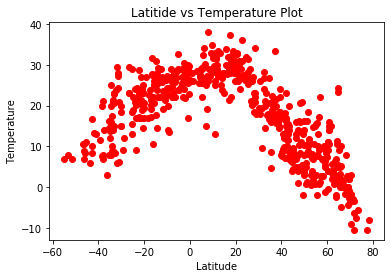

In [20]:
x = pd.to_numeric(city_df["Lat"])
y = pd.to_numeric(city_df["Max Temp"])
plt.scatter(x,y,marker="o",color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitide vs Temperature Plot")
plt.savefig("output_data/Latitide vs Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

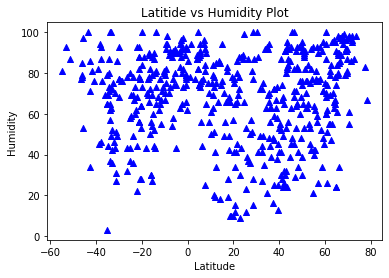

In [21]:
x = pd.to_numeric(city_df["Lat"])
y = pd.to_numeric(city_df["Humidity"])
plt.scatter(x,y,marker="^",color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitide vs Humidity Plot")
plt.savefig("output_data/Latitide vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

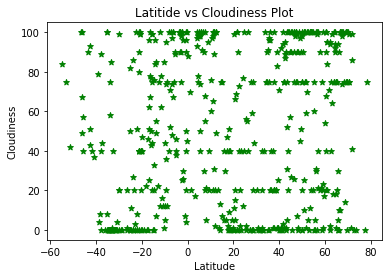

In [22]:
x = pd.to_numeric(city_df["Lat"])
y = pd.to_numeric(city_df["Cloudiness"])
plt.scatter(x,y,marker="*",color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitide vs Cloudiness Plot")
plt.savefig("output_data/Latitide vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

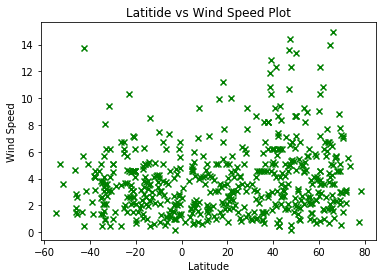

In [23]:
x = pd.to_numeric(city_df["Lat"])
y = pd.to_numeric(city_df["Wind Speed"])
plt.scatter(x,y,marker="x",color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitide vs Wind Speed Plot")
plt.savefig("output_data/Latitide vs Wind Speed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression